# INŠTALÁCIA KNIŽNÍC

In [ ]:
!pip install BERTopic


In [4]:
from bertopic import BERTopic


In [5]:
import os
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = os.path.join("/content/drive/My Drive/", 'BERT_senti_data.csv')
bertdata = pd.read_csv(path)
bertdata=bertdata.drop(columns=['Unnamed: 0'])


In [7]:
path = os.path.join("/content/drive/My Drive/", 'classified_test_data.csv')
lstmdata = pd.read_csv(path)
lstmdata=lstmdata.drop(columns=['Unnamed: 0'])


In [8]:
path = os.path.join("/content/drive/My Drive/", 'VADERclassified_test_data.csv')
testdata = pd.read_csv(path)
testdata=testdata.drop(columns=['Unnamed: 0'])

In [ ]:
testdata['Scores'] =bertdata['Scores']
testdata['SentimentLSTM'] = lstmdata['SentimentLSTM']


In [10]:
testdata

,Unnamed: 0.1,Tweets,Postag-Lemmatized Sentence,Pos-Lem Sen without tags,Sentence-word object,Sentiment,VaderSentiment,Scores,SentimentLSTM
0,0,If IoT Is Built On Sensing How Good Are Our Se...,"[('iot', 'NN'), ('build', 'VBN'), ('sense', 'V...",iot build sense good sensor esappin forbes rea...,<__main__.Sentence object at 0x7fc2c9143f90>,positive,positive,neutral,positive
1,1,How many GSTR can be successfully done by toda...,"[('many', 'JJ'), ('gstr', 'NNS'), ('successful...",many gstr successfully do today gstr gstr gstr...,<__main__.Sentence object at 0x7fc2c90da8d0>,neutral,positive,neutral,positive
2,2,Challenger Banks Use Mobile IDVerification To ...,"[('challenger', 'NN'), ('bank', 'NNS'), ('use'...",challenger bank use mobile idverification get ...,<__main__.Sentence object at 0x7fc2c767e950>,positive,positive,neutral,positive
3,3,Mr Mahesh Shaw Jharkhand would like to thank t...,"[('mr', 'NN'), ('mahesh', 'JJ'), ('shaw', 'NN'...",mr mahesh shaw jharkhand would like thank bank...,<__main__.Sentence object at 0x7fc2f5166e50>,positive,positive,positive,positive
4,4,finance finacialfreedom Investing wealth affil...,"[('finance', 'NN'), ('finacialfreedom', 'NN'),...",finance finacialfreedom invest wealth affiliat...,<__main__.Sentence object at 0x7fc2c90d1250>,neutral,positive,neutral,negative
...,...,...,...,...,...,...,...,...,...
22672,22672,LKPSECURITIES INDEX LKPSECURITIES InvestmentId...,"[('lkpsecurities', 'NNS'), ('index', 'NN'), ('...",lkpsecurities index lkpsecurities investmentid...,<__main__.Sentence object at 0x7fc2c5a94b90>,positive,positive,neutral,positive
22673,22673,According to research by JampA crossborder de...,"[('accord', 'VBG'), ('research', 'NN'), ('jamp...",accord research jampa crossborder deal worth b...,<__main__.Sentence object at 0x7fc2c5a8d0d0>,neutral,positive,neutral,neutral
22674,22674,USDCAD resumes push lower as sellers look to b...,"[('usdcad', 'JJ'), ('resume', 'NNS'), ('push',...",usdcad resume push low seller look build momen...,<__main__.Sentence object at 0x7fc2c5a86e90>,negative,negative,neutral,negative
22675,22675,Theres always a lot to learn on EarthDay TODAY...,"[('there', 'NNS'), ('always', 'RB'), ('lot', '...",there always lot learn earthday today free onl...,<__main__.Sentence object at 0x7fc2c5a86e50>,positive,positive,positive,positive


# REPREZENTÁCIA MOJHO MODELU PO KLASIFIKOVANI



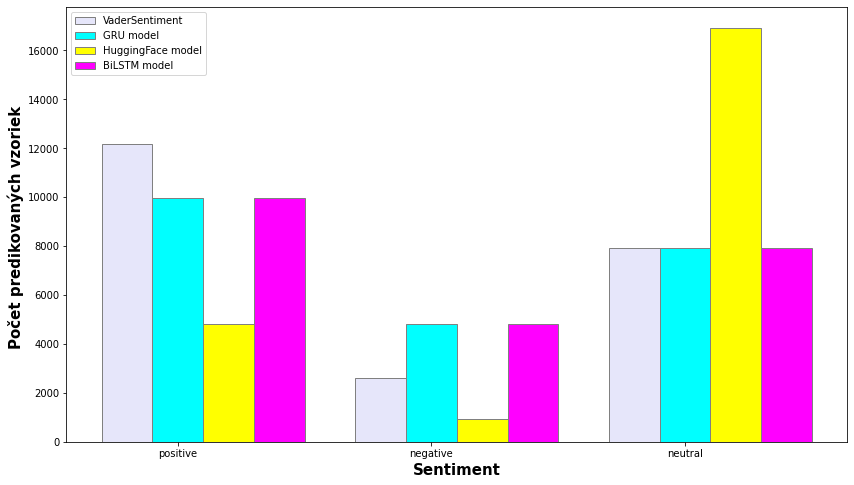

In [19]:
import numpy as np
import matplotlib.pyplot as plt

vader_positive = testdata[testdata['VaderSentiment'] == 'positive']
vader_negative = testdata[testdata['VaderSentiment'] == 'negative']
vader_neutral = testdata[testdata['VaderSentiment'] == 'neutral']

bert_positive = testdata[testdata['Scores'] == 'positive']
bert_negative = testdata[testdata['Scores'] == 'negative']
bert_neutral = testdata[testdata['Scores'] == 'neutral']

my_positive = testdata[testdata['Sentiment'] == 'positive']
my_negative = testdata[testdata['Sentiment'] == 'negative']
my_neutral = testdata[testdata['Sentiment'] == 'neutral']

my_LSTMpositive = testdata[testdata['Sentiment'] == 'positive']
my_LSTMnegative = testdata[testdata['Sentiment'] == 'negative']
my_LSTMneutral = testdata[testdata['Sentiment'] == 'neutral']

sentiment_plot_array = [
                        [len(vader_positive), len(vader_negative), len(vader_neutral)],
                        [len(my_positive), len(my_negative), len(my_neutral)],
                        [len(bert_positive), len(bert_negative), len(bert_neutral)],
                        [len(my_LSTMpositive), len(my_LSTMnegative), len(my_LSTMneutral)]

]

fig = plt.subplots(figsize =(14, 8))
barWidth = 0.20

br1 = np.arange(len(sentiment_plot_array[0]))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

plt.bar(br1, sentiment_plot_array[0], color ='lavender', width = barWidth,
        edgecolor ='grey', label ='VaderSentiment')
plt.bar(br2, sentiment_plot_array[1], color ='cyan', width = barWidth,
        edgecolor ='grey', label ='GRU model')
plt.bar(br3, sentiment_plot_array[2], color ='yellow', width = barWidth,
        edgecolor ='grey', label ='HuggingFace model')
plt.bar(br4, sentiment_plot_array[3], color ='magenta', width = barWidth,
        edgecolor ='grey', label ='BiLSTM model')
plt.xlabel('Sentiment', fontweight ='bold', fontsize = 15)
plt.ylabel('Počet predikovaných vzoriek ', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(sentiment_plot_array[0]))],
        ['positive', 'negative', 'neutral'])
 
plt.legend()
plt.show()



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sn

classes = ['positive','neutral','negative']
cm = confusion_matrix(testdata['VaderSentiment'], testdata['Sentiment'],labels=classes,normalize='true')
# print(cm)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
# disp.plot() 
df_cm = pd.DataFrame(cm, index = [i for i in classes],
              columns = [i for i in classes])
fig = plt.subplots(figsize =(12, 8))

sn.heatmap(df_cm, annot=True,cmap="GnBu")

VADERVSGRU

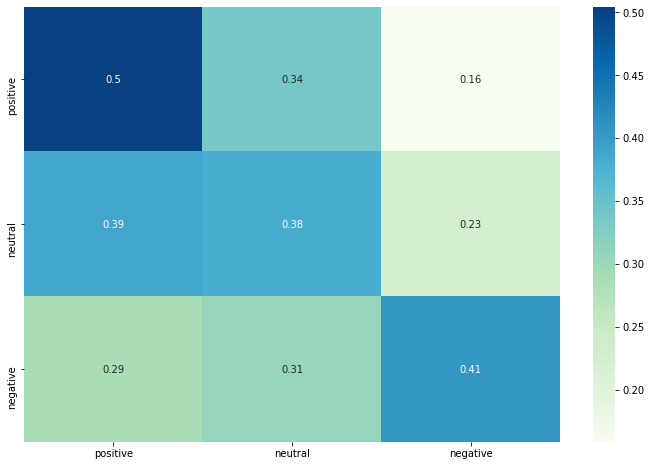

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sn

classes = ['positive','neutral','negative']
cm = confusion_matrix(testdata['VaderSentiment'], testdata['Sentiment'],labels=classes,normalize='true')
# print(cm)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
# disp.plot() 
df_cm = pd.DataFrame(cm, index = [i for i in classes],
              columns = [i for i in classes])
fig = plt.subplots(figsize =(12, 8))

sn.heatmap(df_cm, annot=True,cmap="GnBu")


GRUSENTIMENT VS. BILSTM SENTIMENT

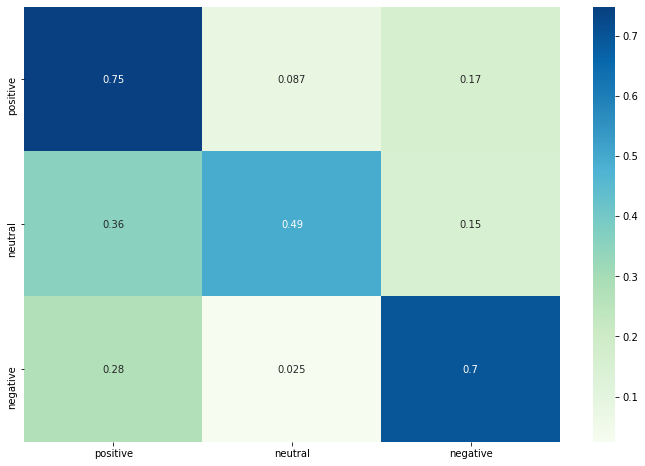

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sn

classes = ['positive','neutral','negative']
cm = confusion_matrix(testdata['Sentiment'], testdata['SentimentLSTM'],labels=classes,normalize='true')
# print(cm)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
# disp.plot() 
df_cm = pd.DataFrame(cm, index = [i for i in classes],
              columns = [i for i in classes])
fig = plt.subplots(figsize =(12, 8))

sn.heatmap(df_cm, annot=True,cmap="GnBu")

GRUVSBERT

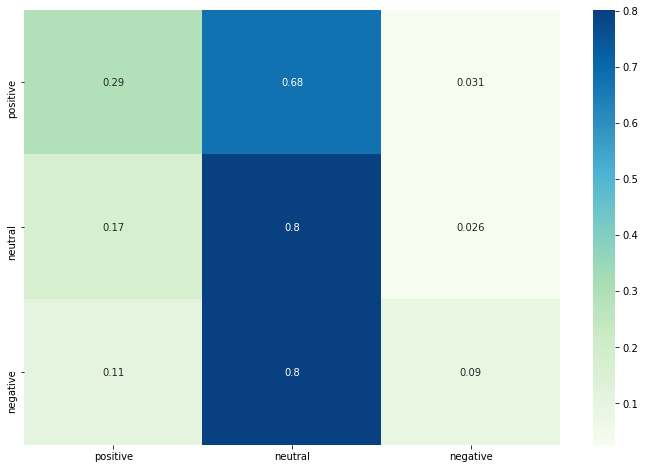

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sn

classes = ['positive','neutral','negative']
cm = confusion_matrix(testdata['Sentiment'], testdata['Scores'],labels=classes,normalize='true')
# print(cm)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
# disp.plot() 
df_cm = pd.DataFrame(cm, index = [i for i in classes],
              columns = [i for i in classes])
fig = plt.subplots(figsize =(12, 8))

sn.heatmap(df_cm, annot=True,cmap="GnBu")

LSTMVBERT

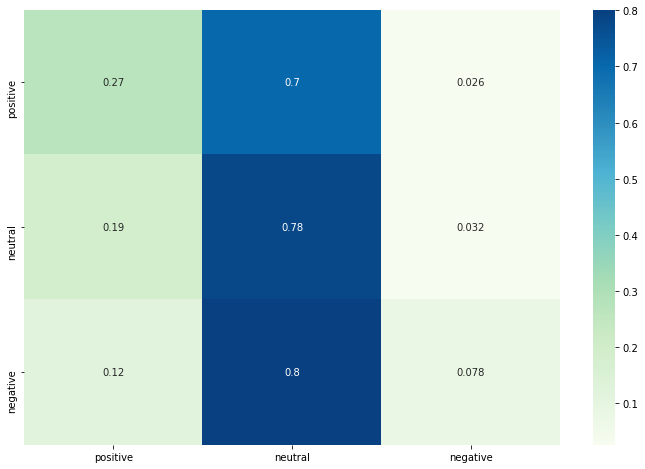

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sn

classes = ['positive','neutral','negative']
cm = confusion_matrix(testdata['SentimentLSTM'], testdata['Scores'],labels=classes,normalize='true')
# print(cm)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
# disp.plot() 
df_cm = pd.DataFrame(cm, index = [i for i in classes],
              columns = [i for i in classes])
fig = plt.subplots(figsize =(12, 8))

sn.heatmap(df_cm, annot=True,cmap="GnBu")

LSTMVSVADER

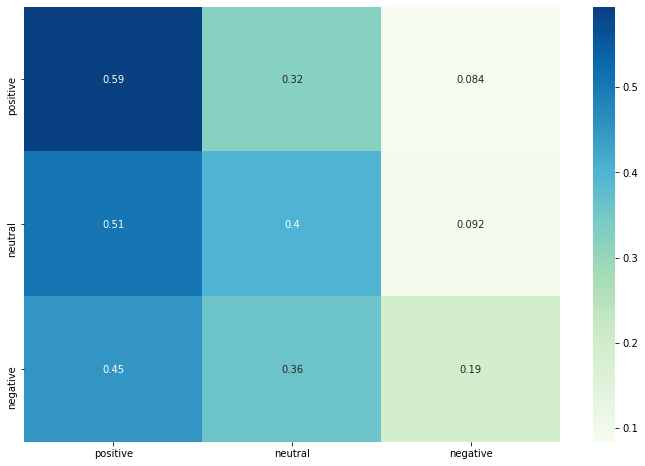

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sn

classes = ['positive','neutral','negative']
cm = confusion_matrix(testdata['SentimentLSTM'], testdata['VaderSentiment'],labels=classes,normalize='true')
# print(cm)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
# disp.plot() 
df_cm = pd.DataFrame(cm, index = [i for i in classes],
              columns = [i for i in classes])
fig = plt.subplots(figsize =(12, 8))

sn.heatmap(df_cm, annot=True,cmap="GnBu")

In [12]:
topic_model = BERTopic(language="english",min_topic_size= 25, top_n_words= 20)
topics, _ = topic_model.fit_transform(testdata['Pos-Lem Sen without tags'])

SENTIMENT KLASIFIKACIA Z MOJHO MODELU

In [13]:
topic_model.get_topic_info()


,Topic,Count,Name
0,-1,10029,-1_make_learn_click_blockchain
1,133,702,133_btc_read_cryptocurrency_forex
2,104,515,104_bankingandfinancenews_retweet_lending_covid
3,81,438,81_gold_silver_metal_mining
4,46,426,46_finanza_finanzas_banca_banco
...,...,...,...
136,118,27,118_tax_refund_taxreform_irs
137,30,27,30_safezonefinance_bnb_zseed_bscex
138,83,27,83_analysis_ark_arkinvest_price
139,111,27,111_remotejob_remotework_remotely_remote


In [14]:
topic_model.visualize_topics()

In [15]:
class_topic = topic_model.topics_per_class(testdata['Pos-Lem Sen without tags'], topics, testdata['Sentiment'].values)
topic_model.visualize_topics_per_class(class_topic)

In [16]:
class_topic = topic_model.topics_per_class(testdata['Tweets'], topics, testdata['SentimentLSTM'].values) 
topic_model.visualize_topics_per_class(class_topic)

SENTIMENT KLASIFIKACIA Z VADER MODELU

In [ ]:
class_topic = topic_model.topics_per_class(testdata['Tweets'], topics, testdata['VaderSentiment'].values)
topic_model.visualize_topics_per_class(class_topic)

In [17]:
class_topic = topic_model.topics_per_class(testdata['Tweets'], topics, testdata['Scores'].values) #SentimentLSTM
topic_model.visualize_topics_per_class(class_topic)